<a href="https://colab.research.google.com/github/bhavana9999/INTERNSOFTCodefiles/blob/master/feedforward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*setup*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
from IPython.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs 
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","blue","green"])

In [3]:
np.random.seed(0)

#class sigmoid

In [4]:
class sigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w_mse(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  def grad_b_mse(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  def grad_w_ce(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    if y==0:
      return y_pred*x
    elif y==1:
      return -1*(1-y_pred)*x
    else:
      raise ValueError("y should be 0 or 1")
  def grad_b_ce(self,x,y):
    y_pred=self.sigmoid(slef.perceptron(x)) 
    if y==0:
      return y_pred
    elif y==1:
      return -1*(1-y_pred)
    else:
      raise ValueError("y should be 0 or 1") 
  def fit(self,X,Y,epochs=1,learningrate=1,initialise=True,loss_fn='mse',display_loss=False):
    if initialise:
      self.w=np.random.randn(1,X.shape[1]) 
      self.b=0
    if display_loss:
      loss=[]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        if loss_fn=="mse":
          dw+=self.grad_w_mse(x,y)
          db+=self.grad_b_mse(x,y)
        elif loss_fn=="ce":
          dw+=self.grad_w_ce(x,y)
          db+=self.grad_b_ce(x,y)
      m=X.shape[1]
      self.w-=learningrate*dw/m
      self.b-=learningrate*db/m
      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        if loss_fn=="mse":
          loss.append(mean_squared_error(Y,Y_pred))
        elif loss_fn=="ce":
          loss.append(log_loss(Y,Y_pred))
    if display_loss:
      plt.plot(loss)
      plt.xlabel("epochs")
      if loss_fn=="mse":
        plt.ylabel("mean_squared_error")
      elif loss_fn=="ce":
        plt.ylabel("log_loss")
      plt.show()  
      print(loss) 
  def predict(self,x):
    y_pred=[]
    for X in x:
      Y_pred=self.sigmoid(self.perceptron(X))
      y_pred.append(Y_pred)
    plt.plot(y_pred)
    return np.array(y_pred)       


#generate data

In [5]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


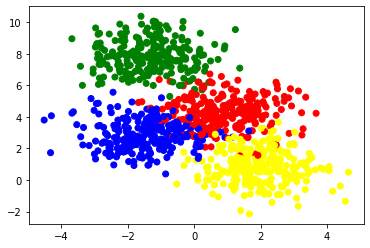

In [6]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [7]:
labels_orig=labels
labels=np.mod(labels_orig,2)

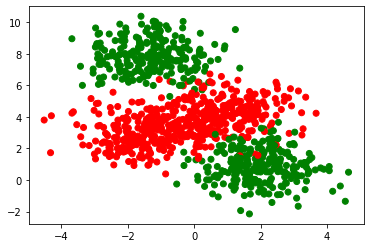

In [8]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [9]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(750, 2) (750,) (250, 2) (250,)


#sn classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


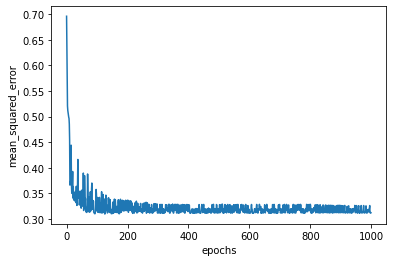

[0.6958690191497099, 0.6297908004310919, 0.5454823725249187, 0.5206865358949708, 0.5120321993459614, 0.5071059662476638, 0.5027989085141121, 0.49894919309611957, 0.49647651208219784, 0.4853931333759524, 0.455158847991892, 0.36627161347457543, 0.37204063132977133, 0.37287387415330137, 0.3761899220036656, 0.444186740294538, 0.36855731659576607, 0.3510949838723286, 0.35013710599251363, 0.3730397975545, 0.39280593592263274, 0.3415922359423792, 0.3634581101578782, 0.33898438665482883, 0.34979804433616374, 0.33649993419763, 0.3464594170909915, 0.33532620056174095, 0.3517384484532536, 0.35365666616028724, 0.35046293906496584, 0.3319146633243641, 0.36392350508114396, 0.3360065149085796, 0.3265890093636926, 0.3395286680854255, 0.3680117284981965, 0.4163385982973238, 0.3592070009561187, 0.3406445422400265, 0.3531307800013313, 0.34546497554110267, 0.32749366441953753, 0.33553741554537625, 0.35448262262430336, 0.3543051083259969, 0.3381667809624317, 0.3287053542899888, 0.3212822518534151, 0.331408

In [10]:
sn1=sigmoidNeuron()
sn1.fit(x_train,y_train,epochs=1000,learningrate=1,display_loss=True)


#our first FF network

In [11]:
class FFNetwork1:
  def __init__(self):
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.b1=0
    self.b2=0
    self.b3=0
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forward_pass(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)
    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a2)
    self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
    self.h3=self.sigmoid(self.a3)
    return self.h3
  def grad(self,x,y):
    self.forward_pass(x)
    self.dw1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x1
  def fit(self,X,Y,epochs=1,learningrate=1,display_loss=False):
    if display_loss:
      loss=[]
      w1=[]
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3=[0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1+=self.dw1
      m=X.shape[0]
      self.w1-=learningrate*dw1/m
      if display_loss:
        w1.append(self.w1)
        Y_pred=self.predict(X)
        loss.append(mean_squared_error(Y_pred,Y))
    if display_loss:
        plt.tight_layout()
        plt.subplot(2,1,1)
        plt.plot(w1)
        plt.xlabel("epochs")
        plt.ylabel("w1")
        plt.subplot(2,1,2)
        plt.plot(loss)
        plt.xlabel("epochs")
        plt.ylabel("mean_squared_error")
        
        plt.show()

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)        





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


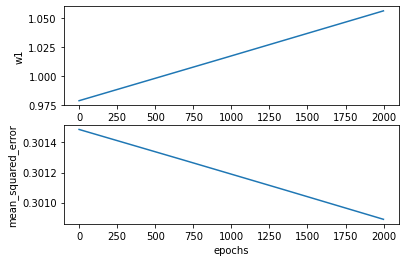

In [12]:
ffn1=FFNetwork1()
ffn1.fit(x_train,y_train,epochs=2000,learningrate=0.01,display_loss=True)

In [13]:
class FirstFFNetwork:
  def __init__(self):
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.b1=0
    self.b2=0
    self.b3=0
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forward_pass(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)
    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a2)
    self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
    self.h3=self.sigmoid(self.a3)
    return self.h3
  def grad(self,x,y):
    self.forward_pass(x)
    self.dw5=(self.h3-y)*self.h3*(1-self.h3)*self.h1
    self.dw6=(self.h3-y)*self.h3*(1-self.h3)*self.h2
    self.db3=(self.h3-y)*self.h3*(1-self.h3)
    
    self.dw1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x1
    self.dw2=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x2
    self.db1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)

    self.dw3=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x1
    self.dw4=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x2
    self.db2=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)
  def fit(self,X,Y,epochs=1,learningrate=1,initialize=True,display_loss=False,display_weight=False):
    if initialize:
      np.random.seed(0)
      self.w1=np.random.randn()
      self.w2=np.random.randn()
      self.w3=np.random.randn()
      self.w4=np.random.randn()
      self.w5=np.random.randn()
      self.w6=np.random.randn()
      self.b1=0
      self.b2=0
      self.b3=0
    if display_loss:
      loss=[]
   #   w1=[]
    if display_weight:
      weight_matrices=[]
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3=[0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1+=self.dw1
        dw2+=self.dw2
        dw3+=self.dw3
        dw4+=self.dw4
        dw5+=self.dw5
        dw6+=self.dw6
        db1+=self.db1
        db2+=self.db2
        db3+=self.db3
      m=X.shape[0]
      self.w1-=learningrate*dw1/m
      self.w2-=learningrate*dw2/m
      self.w3-=learningrate*dw3/m
      self.w4-=learningrate*dw4/m
      self.w5-=learningrate*dw5/m
      self.w6-=learningrate*dw6/m
      self.b1-=learningrate*db1/m
      self.b2-=learningrate*db2/m
      self.b3-=learningrate*db3/m
      if display_weight:
        weight_matrix=np.array([[0,self.b3,self.w5,self.w6,0,0,],[self.b1,self.w1,self.w2,self.w3,self.w4,self.b2]])
        weight_matrices.append(weight_matrix)
      if display_loss:
      #  w1.append(self.w1)
        Y_pred=self.predict(X)
        loss.append(mean_squared_error(Y_pred,Y))
    if display_loss:
      #  plt.tight_layout()
     #  plt.subplot(2,1,1)
      #  plt.plot(w1)
       # plt.xlabel("epochs")
        #plt.ylabel("w1")
        plt.subplot(2,1,2)
        plt.plot(loss)
        plt.xlabel("epochs")
        plt.ylabel("mean_squared_error")
        
        plt.show()
    if display_weight:
       print(weight_matrices)       

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)        
  def predict_h1(self,X,binary=True):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred) 
  def predict_h2(self,X,binary=True):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  def predict_h3(self,X,binary=True):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


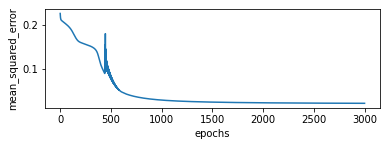

In [14]:

weight_matrices=[]
ffn=FirstFFNetwork()
ffn.fit(x_train,y_train,epochs=3000,learningrate=2,initialize=True,display_loss=True)

True

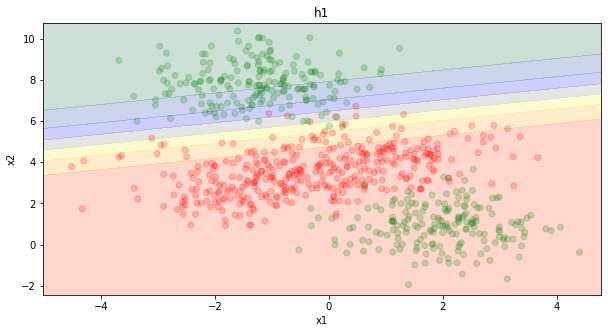

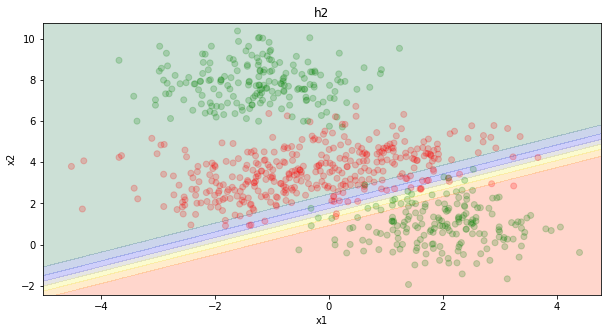

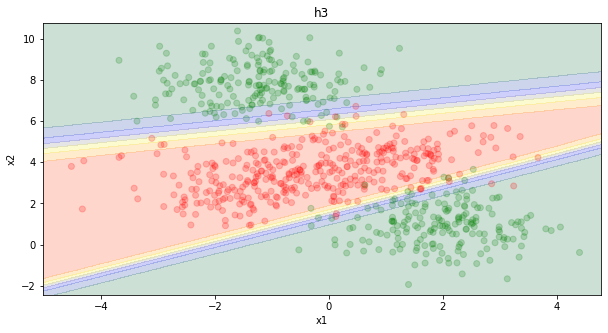

In [15]:
def make_meshgrid(x,y,h=.2):
  x_min,x_max=x.min()-0.5,x.max()+0.5
  y_min,y_max=y.min()-0.5,y.max()+0.5
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx, yy
def plot_contours(ax,predict,xx,yy,**params):
  z=predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  out=ax.contourf(xx,yy,z,**params)
  return out
def plot_boundary():
    xx,yy=make_meshgrid(x_train[:,0],x_train[:,1])
    predict_functions=[ffn.predict_h1,ffn.predict_h2,ffn.predict_h3]
    for i in range(3):
      fig,ax=plt.subplots(figsize=(10,5))
      plot_contours(ax,predict_functions[i],xx,yy,cmap=my_cmap,alpha=0.2)
      ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=my_cmap,alpha=0.2)
      ax.set_xlim(xx.min(),xx.max())
      ax.set_ylim(yy.min(),yy.max())
      ax.set_xlabel('x1')
      ax.set_ylabel('x2')
      ax.set_title("h"+str(i+1))
    return True

plot_boundary() 




#multiclass specific

In [16]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels_orig,stratify=labels_orig,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


In [17]:
labels_orig.shape

(1000,)

In [18]:
enc=OneHotEncoder()
y_oh_train=enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_oh_val=enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_oh_train.shape,y_oh_val.shape)

(750, 4) (250, 4)


In [19]:
class FFSN_Multiclass_specific:
  weight_matrices=[]
  def __init__(self):
    np.random.seed(0)
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.w7=np.random.randn()
    self.w8=np.random.randn()
    self.w9=np.random.randn()
    self.w10=np.random.randn()
    self.w11=np.random.randn()
    self.w12=np.random.randn()
    self.b1=0
    self.b2=0
    self.b3=0
    self.b4=0
    self.b5=0
    self.b6=0
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forward_pass(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)
    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a2)
    self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
    self.a4=self.w7*self.h1+self.w8*self.h2+self.b4
    self.a5=self.w9*self.h1+self.w10*self.h2+self.b5
    self.a6=self.w11*self.h1+self.w12*self.h2+self.b6
    sum_exps=np.sum([np.exp(self.a3),np.exp(self.a4),np.exp(self.a5),np.exp(self.a6)])
    self.h3=np.exp(self.a3)/sum_exps
    self.h4=np.exp(self.a4)/sum_exps
    self.h5=np.exp(self.a5)/sum_exps
    self.h6=np.exp(self.a6)/sum_exps
    return np.array([self.h3,self.h4,self.h5,self.h6])
  def grad(self,x,y):
    self.forward_pass(x)
    self.y1,self.y2,self.y3,self.y4=y
    
    self.dw5=(self.h3-self.y1)*self.h1
    self.dw6=(self.h3-self.y1)*self.h2
    self.db3=(self.h3-self.y1)
    
    self.dw7=(self.h4-self.y2)*self.h1
    self.dw8=(self.h4-self.y2)*self.h2
    self.db4=(self.h4-self.y2)
    
    self.dw9=(self.h5-self.y3)*self.h1
    self.dw10=(self.h5-self.y3)*self.h2
    self.db5=(self.h5-self.y3)
    
    self.dw11=(self.h6-self.y4)*self.h1
    self.dw12=(self.h6-self.y4)*self.h2
    self.db6=(self.h6-self.y4)

    self.dh1=(self.h3-self.y1)*self.w5+(self.h4-self.y2)*self.w7+(self.h5-self.y3)*self.w9+(self.h6-self.y4)*self.w11
    self.dw1=self.dh1*self.h1*(1-self.h1)*self.x1
    self.dw2=self.dh1*self.h1*(1-self.h1)*self.x2
    self.db1=self.dh1*self.h1*(1-self.h1)

    self.dh2=(self.h3-self.y1)*self.w6+(self.h4-self.y2)*self.w8+(self.h5-self.y3)*self.w10+(self.h6-self.y4)*self.w12
    self.dw3=self.dh2*self.h2*(1-self.h2)*self.x1
    self.dw4=self.dh2*self.h2*(1-self.h2)*self.x2
    self.db2=self.dh2*self.h2*(1-self.h2)
  def grad_short(self,x,y):
    self.forward_pass(x)
    self.y1,self.y2,self.y3,self.y4=y

    self.da3=(self.h3-self.y1)
    self.da4=(self.h4-self.y2)
    self.ds5=(self.h5-self.y3)
    self.da6=(self.h6-self.y4)

    self.dw5=self.da3*self.h1
    self.dw6=self.da3*self.h2
    self.db3=self.da3
    
    self.dw7=self.da4*self.h1
    self.dw8=self.da4*self.h2
    self.db4=self.da4
    
    self.dw9=self.da5*self.h1
    self.dw10=self.da5*self.h2
    self.db5=self.da5
    
    self.dw11=self.da6*self.h1
    self.dw12=self.da6*self.h2
    self.db6=self.da6

    self.dh1=self.da3*self.w5+self.da4*self.w7+self.da5*self.w9+self.da6*self.w11
    self.dh2=self.da3*self.w6+self.da4*self.w8+self.da5*self.w10+self.da6*self.w12

    self.da1=self.dh1*self.h1*(1-self.h1)
    self.da2=self.dh2*self.h2*(1-self.h2)
    
    self.dw1=self.da1*self.x1
    self.dw2=self.da1*self.x2
    self.db1=self.da1

    self.dw3=self.da2*self.x1
    self.dw4=self.da2*self.x2
    self.db2=self.da2*(1-self.h2)

  def fit(self,X,Y,epochs=1,learningrate=1,display_loss=False,display_weight=False):
    if display_loss:
      loss=[]

    
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,dw11,dw12,db1,db2,db3,db4,db5,db6=[0]*18
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1+=self.dw1
        dw2+=self.dw2
        dw3+=self.dw3
        dw4+=self.dw4
        dw5+=self.dw5
        dw6+=self.dw6
        db1+=self.db1
        db2+=self.db2
        db3+=self.db3
        dw7+=self.dw7
        dw8+=self.dw8
        dw9+=self.dw9
        dw10+=self.dw10
        dw11+=self.dw11
        dw12+=self.dw12
        db4+=self.db4
        db5+=self.db5
        db6+=self.db6
      m=X.shape[0]
      self.w1-=learningrate*dw1/m
      self.w2-=learningrate*dw2/m
      self.w3-=learningrate*dw3/m
      self.w4-=learningrate*dw4/m
      self.w5-=learningrate*dw5/m
      self.w6-=learningrate*dw6/m
      self.b1-=learningrate*db1/m
      self.b2-=learningrate*db2/m
      self.b3-=learningrate*db3/m
      if display_weight:
        weight_matrix=np.array([[self.b3,self.w5,self.w6,self.b4,self.w7,self.w8,self.b5,self.w9,self.w10,self.b6,self.w11,self.w12],[0,0,0,self.b1,self.w1,self.w2,self.b2,self.w3,self.w4,0,0,0]])
        weight_matrices.append(weight_matrix)
      if display_loss:
     
        Y_pred=self.predict(X)
        loss.append(log_loss(np.argmax(Y,axis=1),Y_pred))
    if display_loss:
        plt.plot(loss)
        plt.xlabel("epochs")
        plt.ylabel("log_loss")
        plt.show()
    if display_weight:
       print(weight_matrices)      

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)    
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


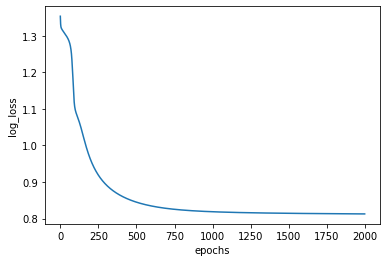

[array([[ 0.0796566 ,  1.9541921 , -0.88806884,  0.        ,  0.95008842,
        -0.15135721,  0.        , -0.10321885,  0.4105985 ,  0.        ,
         0.14404357,  1.45427351],
       [ 0.        ,  0.        ,  0.        , -0.0032771 ,  1.79727972,
         0.35089549, -0.0091813 ,  0.97494943,  2.2346306 ,  0.        ,
         0.        ,  0.        ]]), array([[ 0.1310552 ,  2.01656323, -0.82567906,  0.        ,  0.95008842,
        -0.15135721,  0.        , -0.10321885,  0.4105985 ,  0.        ,
         0.14404357,  1.45427351],
       [ 0.        ,  0.        ,  0.        , -0.00720974,  1.83017001,
         0.29443863, -0.01753664,  0.97223026,  2.2284177 ,  0.        ,
         0.        ,  0.        ]]), array([[ 0.1647451 ,  2.06325382, -0.77992564,  0.        ,  0.95008842,
        -0.15135721,  0.        , -0.10321885,  0.4105985 ,  0.        ,
         0.14404357,  1.45427351],
       [ 0.        ,  0.        ,  0.        , -0.00955942,  1.8610628 ,
         0.242459

In [20]:
ffsn_multi_specific=FFSN_Multiclass_specific()
ffsn_multi_specific.fit(X_train,y_oh_train,epochs=2000,learningrate=1,display_loss=True,display_weight=True)

In [21]:
'''def plot_heat_map(epoch):
  fig=plt.figure(figsize=(10,1))
  print(weight_matrices)
  sns.heatmap(weight_matrices[epoch],annot=True,cmap=my_cmap,vmin=-3,vmax=3)
  plt.title("epoch"+str(epoch))
  fig.canvas.draw()
  image=np.frombuffer(fig.canvas.tostring_rgb(),dtype='unit8')
  image=image.reshape(fig.canvas.get_width_height()[::-1]+(3,))
  return image'''

'def plot_heat_map(epoch):\n  fig=plt.figure(figsize=(10,1))\n  print(weight_matrices)\n  sns.heatmap(weight_matrices[epoch],annot=True,cmap=my_cmap,vmin=-3,vmax=3)\n  plt.title("epoch"+str(epoch))\n  fig.canvas.draw()\n  image=np.frombuffer(fig.canvas.tostring_rgb(),dtype=\'unit8\')\n  image=image.reshape(fig.canvas.get_width_height()[::-1]+(3,))\n  return image'

In [22]:
'''imageio.mimsave('./weights_viz.gif',[plot_heat_map(i) for i in range(0,len(weight_matrices),40)],fps=1)'''

"imageio.mimsave('./weights_viz.gif',[plot_heat_map(i) for i in range(0,len(weight_matrices),40)],fps=1)"

#exercises

In [23]:
class FFSN_Multiclass_myclass:
  weight_matrices=[]
  def __init__(self):
    np.random.seed(0)
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.w7=np.random.randn()
    self.w8=np.random.randn()
    self.w9=np.random.randn()
    self.w10=np.random.randn()
 
    self.b1=0
    self.b2=0
    self.b3=0
    self.b4=0
    self.b5=0
   
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forward_pass(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)
    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a2)
    self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
    self.a4=self.w7*self.h1+self.w8*self.h2+self.b4
    self.h3=self.sigmoid(self.a3)
    self.h4=self.sigmoid(self.a4)
    self.a5=self.w9*self.h3+self.w10*self.h4+self.b5
    self.h5=self.sigmoid(self.a5)
    return self.h5
  def grad(self,x,y):
    self.forward_pass(x)
    self.y1=y
    
    self.da5=(self.h5-self.y1)*self.h5*(1-self.h5)
    self.dw9=self.da5*self.h3
    self.dw10=self.da5*self.h4
    self.db5=self.da5

    self.dh3=self.da5*self.w9
    self.dh4=self.da5*self.w10
    self.da3=self.dh3*self.h3*(1-self.h3)
    self.da4=self.dh4*self.h4*(1-self.h4)

    self.dw5=self.da3*self.h1
    self.dw6=self.da3*self.h2
    self.dw7=self.da4*self.h1
    self.dw8=self.da4*self.h2

    self.db3=self.da3
    self.db4=self.da4

    self.dh1=(self.da3*self.w5)+(self.da4*self.w7)
    self.dh2=(self.da3*self.w6)+(self.da4*self.w8)
    self.da1=self.dh1*self.h1*(1-self.h1)
    self.da2=self.dh2*self.h2*(1-self.h2)

    self.dw1=self.da1*self.x1
    self.dw2=self.da1*self.x2
    self.dw3=self.da2*self.x1
    self.dw4=self.da2*self.x2

    self.db1=self.da1
    self.db2=self.da2

  def fit(self,X,Y,epochs=1,learningrate=1,display_loss=False):
    if display_loss:
      loss=[]

    
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,db1,db2,db3,db4,db5=[0]*15
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1+=self.dw1
        dw2+=self.dw2
        dw3+=self.dw3
        dw4+=self.dw4
        dw5+=self.dw5
        dw6+=self.dw6
        db1+=self.db1
        db2+=self.db2
        db3+=self.db3
        dw7+=self.dw7
        dw8+=self.dw8
        dw9+=self.dw9
        dw10+=self.dw10
        
        db4+=self.db4
        db5+=self.db5
       
      m=X.shape[0]
      self.w1-=learningrate*dw1/m
      self.w2-=learningrate*dw2/m
      self.w3-=learningrate*dw3/m
      self.w4-=learningrate*dw4/m
      self.w5-=learningrate*dw5/m
      self.w6-=learningrate*dw6/m
      self.w7-=learningrate*dw7/m
      self.w8-=learningrate*dw8/m
      self.w9-=learningrate*dw9/m
      self.w10-=learningrate*dw10/m
      self.b1-=learningrate*db1/m
      self.b2-=learningrate*db2/m
      self.b3-=learningrate*db3/m
      self.b4-=learningrate*db4/m
      self.b5-=learningrate*db5/m

     
      if display_loss:
     
        Y_pred=self.predict(X)
        loss.append(mean_squared_error(Y_pred,Y))
    if display_loss:
        plt.plot(loss)
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.show()
        

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)    
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


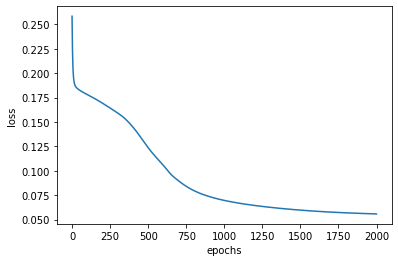

In [24]:
ffsn_multi_myclass=FFSN_Multiclass_myclass()
ffsn_multi_myclass.fit(X_train,y_oh_train,epochs=2000,learningrate=1,display_loss=True)

True

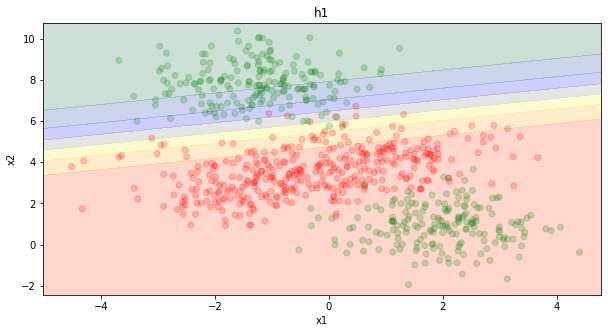

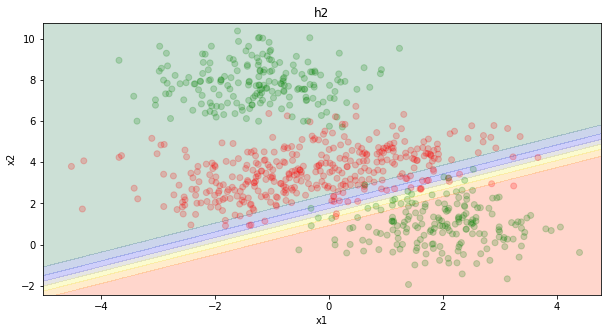

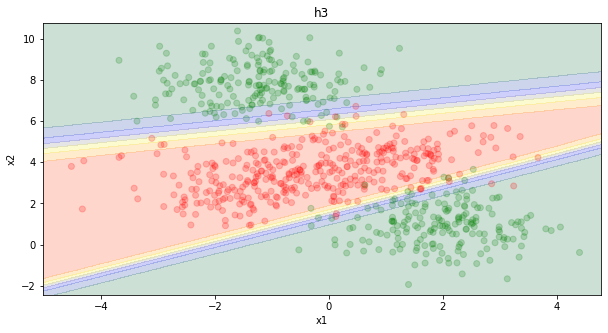

In [25]:
def make_meshgrid(x,y,h=.2):
  x_min,x_max=x.min()-0.5,x.max()+0.5
  y_min,y_max=y.min()-0.5,y.max()+0.5
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx, yy
def plot_contours(ax,predict,xx,yy,**params):
  z=predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  out=ax.contourf(xx,yy,z,**params)
  return out
def plot_boundary():
    xx,yy=make_meshgrid(x_train[:,0],x_train[:,1])
    predict_functions=[ffn.predict_h1,ffn.predict_h2,ffn.predict_h3]
    for i in range(3):
      fig,ax=plt.subplots(figsize=(10,5))
      plot_contours(ax,predict_functions[i],xx,yy,cmap=my_cmap,alpha=0.2)
      ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=my_cmap,alpha=0.2)
      ax.set_xlim(xx.min(),xx.max())
      ax.set_ylim(yy.min(),yy.max())
      ax.set_xlabel('x1')
      ax.set_ylabel('x2')
      ax.set_title("h"+str(i+1))
    return True

plot_boundary() 


In [26]:
W1=np.random.randn(2,2)
W2=np.random.randn(2,4)
print(W1)
print(W2)



[[0.14404357 1.45427351]
 [0.76103773 0.12167502]]
[[ 0.44386323  0.33367433  1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574 -2.55298982  0.6536186 ]]


In [44]:
#multiclass scalar
class FF_Multiclass_scalar:
  def __init__(self,W1,W2):
    self.w1=W1[0][0].copy()
    self.w2=W1[1][0].copy()
    self.w3=W1[0][1].copy()
    self.w4=W1[1][1].copy()
    self.w5=W2[0][0].copy()
    self.w6=W2[1][0].copy()
    self.w7=W2[0][1].copy()
    self.w8=W2[1][1].copy()
    self.w9=W2[0][2].copy()
    self.w10=W2[1][2].copy()
    self.w11=W2[0][3].copy()
    self.w12=W2[1][3].copy()
    self.b1=0
    self.b2=0
    self.b3=0
    self.b4=0
    self.b5=0
    self.b6=0
  def sigmoid(self,X):
    return 1.0/(1.0+np.exp(-X))
  def forward_pass(self,x):
    #input layer
    self.x1,self.x2=x
    #hidden layer
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)
    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a2)
    #output layer
    self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
    self.a4=self.w7*self.h1+self.w8*self.h2+self.b4
    self.a5=self.w9*self.h1+self.w10*self.h2+self.b5
    self.a6=self.w11*self.h1+self.w12*self.h2+self.b5

    sum_exps=np.sum([np.exp(self.a3),np.exp(self.a4),np.exp(self.a5),np.exp(self.a6)])
    self.h3=np.exp(self.a3)/sum_exps
    self.h4=np.exp(self.a4)/sum_exps
    self.h5=np.exp(self.a5)/sum_exps
    self.h6=np.exp(self.a6)/sum_exps

    return np.array([self.h3,self.h4,self.h5,self.h6])
    
  def grad(self,x,y):
    self.forward_pass(x)
    self.y1,self.y2,self.y3,self.y4=y

    
    self.da3=(self.h3-self.y1)
    self.da4=(self.h4-self.y2)
    self.da5=(self.h5-self.y3)
    self.da6=(self.h6-self.y4)

    self.dw5=self.da3*self.h1
    self.dw6=self.da3*self.h2
    self.db3=self.da3

    self.dw7=self.da4*self.h1
    self.dw8=self.da4*self.h2
    self.db4=self.da4

    self.dw9=self.da5*self.h1
    self.dw10=self.da5*self.h2
    self.db5=self.da5

    self.dw11=self.da6*self.h1
    self.dw12=self.da6*self.h2
    self.db5=self.da6

    self.dh1=self.da3*self.w5+self.da4*self.w7+self.da5*self.w9+self.da6*self.w11
    self.dh2=self.da3*self.w6+self.da4*self.w8+self.da5*self.w10+self.da6*self.w12

    self.da1=self.dh1*self.h1*(1-self.h1)
    self.da2=self.dh2*self.h2*(1-self.h2)

    self.dw1=self.da1*self.x1
    self.dw2=self.da1*self.x2
    self.dw3=self.da2*self.x1
    self.dw4=self.da2*self.x2

    self.db1=self.da1
    self.db2=self.da2

  def fit(self,X,Y,epochs=1,learningrate=1,display_loss=False):
    if display_loss:
      loss=[]

    
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,dw11,dw12,db1,db2,db3,db4,db5=[0]*17
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1+=self.dw1
        dw2+=self.dw2
        dw3+=self.dw3
        dw4+=self.dw4
        dw5+=self.dw5
        dw6+=self.dw6
        db1+=self.db1
        db2+=self.db2
        db3+=self.db3
        dw7+=self.dw7
        dw8+=self.dw8
        dw9+=self.dw9
        dw10+=self.dw10
        dw11+=self.dw11
        dw12+=self.dw12
        
        db4+=self.db4
        db5+=self.db5
       
       
      m=X.shape[0]
      self.w1-=learningrate*dw1/m
      self.w2-=learningrate*dw2/m
      self.w3-=learningrate*dw3/m
      self.w4-=learningrate*dw4/m
      self.w5-=learningrate*dw5/m
      self.w6-=learningrate*dw6/m
      self.w7-=learningrate*dw7/m
      self.w8-=learningrate*dw8/m
      self.w9-=learningrate*dw9/m
      self.w10-=learningrate*dw10/m
      self.b1-=learningrate*db1/m
      self.b2-=learningrate*db2/m
      self.b3-=learningrate*db3/m
      self.b4-=learningrate*db4/m
      self.b5-=learningrate*db5/m

     
      if display_loss:
        Y_pred=self.predict(X)
        loss.append(np.argmax(Y,axis=1))
    if display_loss:
        plt.plot(loss)
        plt.xlabel("epochs")
        plt.ylabel("log loss")
        plt.show()

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)

In [55]:
#same code with vectorized weights(reduces the size of code)
class FF_Multiclass_weightvectorized:
  def __init__(self,W1,W2):
    self.W1=W1.copy()
    self.W2=W2.copy()
    self.B1=np.zeros((1,2))
    self.B2=np.zeros((1,4))
  def sigmoid(self,X):
    return 1.0/(1.0+np.exp(-X))
  def softmax(self,x):
    exps=np.exp(x)
    return exps/np.sum(exps)
  def forward_pass(self,x):
    x=x.reshape(1,-1)
    self.A1=np.matmul(x,self.W1)+self.B1
    self.H1=self.sigmoid(self.A1)
    self.A2=np.matmul(self.H1,self.W2)+self.B2
    self.H2=self.softmax(self.A2)
    return self.H2
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze
  def grad_sigmoid(self,x):
    return x*(1-x)
  def grad(self,x,y):
    self.forward_pass(x)
    x=x.reshape(1,-1)
    y=y.reshape(1,-1)
    self.dA2=self.H2-y
    self.dW2=np.matmul(self.H1.T,self.dA2)
    self.dB2=self.dA2
    self.dH1=np.matmul(self.dA2,self.W2.T)
    self.dA1=np.multiply(self.dH1,self.grad_sigmoid(self.H1))
    self.dW1=np.matmul(x.T,self.dA1)
    self.dB1=self.dA1
  def fit(self,X,Y,epochs=1,learningrate=1,display_loss=False):
    if display_loss:
      loss={}
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dW1=np.zeros((2,2))
      dW2=np.zeros((2,4))
      dB1=np.zeros((1,2))
      dB2=np.zeros((1,4))
      for x,y in zip(X,Y):
        self.grad(x,y)
        dW1+=self.dW1
        dW2+=self.dW2
        dB1+=self.dB1
        dB2+=self.dB2
      m=X.shape[0]
      self.W2-=learningrate*(dW2/m)
      self.B2-=learningrate*(dB2/m)
      self.W1-=learningrate*(dW1/m)
      self.B1-=learningrate*(dB1/m)
      if display_loss:
        y_pred=self.predict(X)
        loss[i]=log_loss(np.argmax(Y,axis=1),y_pred)
      if display_loss:
        plt.plot(loss.values())
        plt.xlabel('Epochs')
        plt.ylabel('Log Loss')
        plt.show()
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


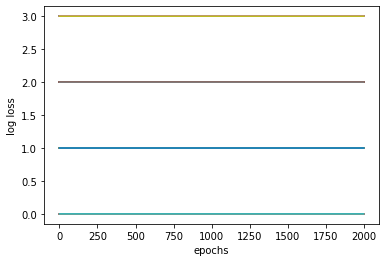

time taken by model1:129.72445797920227


In [57]:
import time
models_init=[FF_Multiclass_scalar(W1,W2)]
for idx,model in enumerate(models_init,start=1):
  tic=time.time()
  ffsn_multi_specific=model
  ffsn_multi_specific.fit(X_train,y_oh_train,epochs=2000,learningrate=1,display_loss=True)
  models.append(ffsn_multi_specific)
  toc=time.time()
  print("time taken by model{}:{}".format(idx,toc-tic))
